In [1]:
# Importando Bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from scipy import sparse
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from keras.layers import Dense, BatchNormalization, Dropout, LSTM
from keras.models import Sequential
from keras.utils import to_categorical
from keras.optimizers import Adam
from tensorflow.keras import regularizers
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import r2_score, accuracy_score
from keras import callbacks
from numpy import count_nonzero
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.options.display.float_format = '{:.2f}'.format
%matplotlib inline

In [2]:
missing_value_formats = ["n.a.", "?", "NA", "n/a", "na", "--"]
dados = pd.read_csv('/content/weatherAUS.csv', na_values = missing_value_formats)

In [3]:
dados.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.40,22.90,0.60,NaN,NaN,W,44.00,W,WNW,20.00,24.00,71.00,22.00,1007.70,1007.10,8.00,NaN,16.90,21.80,No,No
1,2008-12-02,Albury,7.40,25.10,0.00,NaN,NaN,WNW,44.00,NNW,WSW,4.00,22.00,44.00,25.00,1010.60,1007.80,NaN,NaN,17.20,24.30,No,No
2,2008-12-03,Albury,12.90,25.70,0.00,NaN,NaN,WSW,46.00,W,WSW,19.00,26.00,38.00,30.00,1007.60,1008.70,NaN,2.00,21.00,23.20,No,No
3,2008-12-04,Albury,9.20,28.00,0.00,NaN,NaN,NE,24.00,SE,E,11.00,9.00,45.00,16.00,1017.60,1012.80,NaN,NaN,18.10,26.50,No,No
4,2008-12-05,Albury,17.50,32.30,1.00,NaN,NaN,W,41.00,ENE,NW,7.00,20.00,82.00,33.00,1010.80,1006.00,7.00,8.00,17.80,29.70,No,No


In [4]:
dados.shape

(145460, 23)

In [5]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [6]:
# Informações estatísticas
dados.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.00,144199.00,142199.00,82670.00,75625.00,135197.00,143693.00,142398.00,142806.00,140953.00,130395.00,130432.00,89572.00,86102.00,143693.00,141851.00
mean,12.19,23.22,2.36,5.47,7.61,40.04,14.04,18.66,68.88,51.54,1017.65,1015.26,4.45,4.51,16.99,21.68
std,6.40,7.12,8.48,4.19,3.79,13.61,8.92,8.81,19.03,20.80,7.11,7.04,2.89,2.72,6.49,6.94
min,-8.50,-4.80,0.00,0.00,0.00,6.00,0.00,0.00,0.00,0.00,980.50,977.10,0.00,0.00,-7.20,-5.40
25%,7.60,17.90,0.00,2.60,4.80,31.00,7.00,13.00,57.00,37.00,1012.90,1010.40,1.00,2.00,12.30,16.60
50%,12.00,22.60,0.00,4.80,8.40,39.00,13.00,19.00,70.00,52.00,1017.60,1015.20,5.00,5.00,16.70,21.10
75%,16.90,28.20,0.80,7.40,10.60,48.00,19.00,24.00,83.00,66.00,1022.40,1020.00,7.00,7.00,21.60,26.40
max,33.90,48.10,371.00,145.00,14.50,135.00,130.00,87.00,100.00,100.00,1041.00,1039.60,9.00,9.00,40.20,46.70


In [7]:
# Verificando valores nulos
dados.isnull().sum().sum()

343248

In [8]:
# Verificando valores nulos em cada variável
dados.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [9]:
# Total de valores únicos de cada variável
valores_unicos = [] # Criando uma lista vazia
for i in dados.columns[0:24].tolist(): # Loop por todas as colunas
    print(i, ':', len(dados[i].astype(str).value_counts())) # Contando os valores da coluna
    valores_unicos.append(len(dados[i].astype(str).value_counts())) # Adicionando os valores na lista vazia

Date : 3436
Location : 49
MinTemp : 390
MaxTemp : 506
Rainfall : 682
Evaporation : 359
Sunshine : 146
WindGustDir : 17
WindGustSpeed : 68
WindDir9am : 17
WindDir3pm : 17
WindSpeed9am : 44
WindSpeed3pm : 45
Humidity9am : 102
Humidity3pm : 102
Pressure9am : 547
Pressure3pm : 550
Cloud9am : 11
Cloud3pm : 11
Temp9am : 442
Temp3pm : 503
RainToday : 3
RainTomorrow : 3


In [10]:
# Analisando a variável target
dados["RainTomorrow"].value_counts()

RainTomorrow
No     110316
Yes     31877
Name: count, dtype: int64

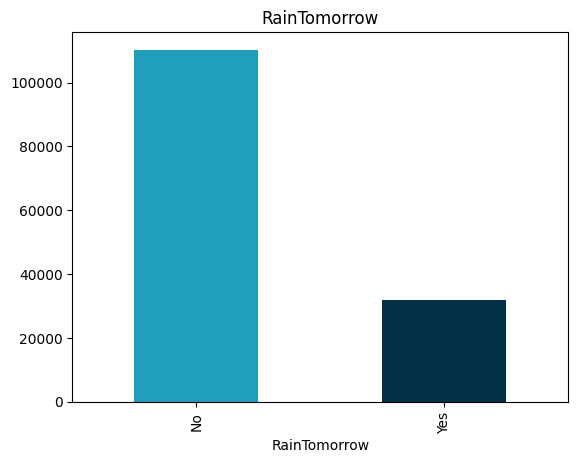

In [11]:
# Visualizando graficamente o balanceadmento da variável target
dados.RainTomorrow.value_counts().plot(kind='bar', title='RainTomorrow',color = ['#219ebc', '#023047']);


In [12]:
# Observando se existem valores nulos na variável alvo
dados["RainTomorrow"].isnull().sum().sum()

3267

In [13]:
# Excluindo os valores nulos da variável alvo
dados = dados.dropna(subset=['RainTomorrow'])

In [14]:
# Conferindo
dados["RainTomorrow"].isnull().sum().sum()

0

In [15]:
# Observando valores duplicados
dados.duplicated().sum()

0

In [16]:
# Analisando data e hora e observando o comprimento do objeto
lengths = dados["Date"].str.len()
lengths.value_counts()

Date
10    142193
Name: count, dtype: int64

In [17]:
dados['Date']= pd.to_datetime(dados["Date"])

In [18]:
# Criando uma coluna para o ano
dados['Year'] = dados.Date.dt.year

In [19]:
# Função para codificar data e hora em parâmetros cíclicos no caso meses e dias
def encode(dados, col, max_val):
    dados[col + '_sin'] = np.sin(2 * np.pi * dados[col]/max_val)
    dados[col + '_cos'] = np.cos(2 * np.pi * dados[col]/max_val)
    return dados

dados['month'] = dados.Date.dt.month
dados = encode(dados, 'month', 12)

dados['day'] = dados.Date.dt.day
dados = encode(dados, 'day', 31)

In [20]:
# Observando as modificações
dados.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,month,month_sin,month_cos,day,day_sin,day_cos
0,2008-12-01,Albury,13.40,22.90,0.60,NaN,NaN,W,44.00,W,WNW,20.00,24.00,71.00,22.00,1007.70,1007.10,8.00,NaN,16.90,21.80,No,No,2008,12,-0.00,1.00,1,0.20,0.98
1,2008-12-02,Albury,7.40,25.10,0.00,NaN,NaN,WNW,44.00,NNW,WSW,4.00,22.00,44.00,25.00,1010.60,1007.80,NaN,NaN,17.20,24.30,No,No,2008,12,-0.00,1.00,2,0.39,0.92
2,2008-12-03,Albury,12.90,25.70,0.00,NaN,NaN,WSW,46.00,W,WSW,19.00,26.00,38.00,30.00,1007.60,1008.70,NaN,2.00,21.00,23.20,No,No,2008,12,-0.00,1.00,3,0.57,0.82
3,2008-12-04,Albury,9.20,28.00,0.00,NaN,NaN,NE,24.00,SE,E,11.00,9.00,45.00,16.00,1017.60,1012.80,NaN,NaN,18.10,26.50,No,No,2008,12,-0.00,1.00,4,0.72,0.69
4,2008-12-05,Albury,17.50,32.30,1.00,NaN,NaN,W,41.00,ENE,NW,7.00,20.00,82.00,33.00,1010.80,1006.00,7.00,8.00,17.80,29.70,No,No,2008,12,-0.00,1.00,5,0.85,0.53


Text(0.5, 0, 'Dias no Ano')

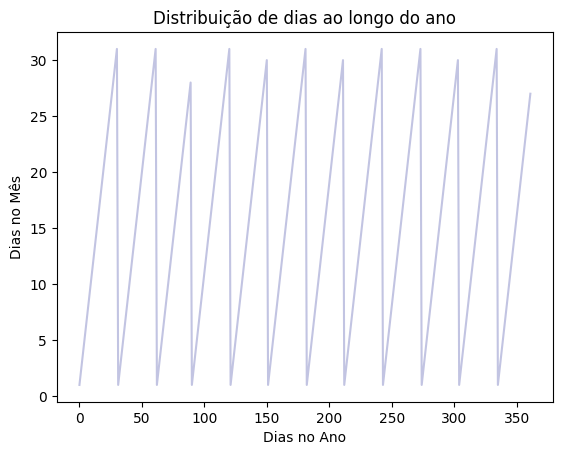

In [21]:
# Observando um ano graficamente
section = dados[:360]
tm = section["day"].plot(color="#C2C4E2")
tm.set_title("Distribuição de dias ao longo do ano")
tm.set_ylabel("Dias no Mês")
tm.set_xlabel("Dias no Ano")

Text(0.5, 0, 'Meses Codificados Por Seno')

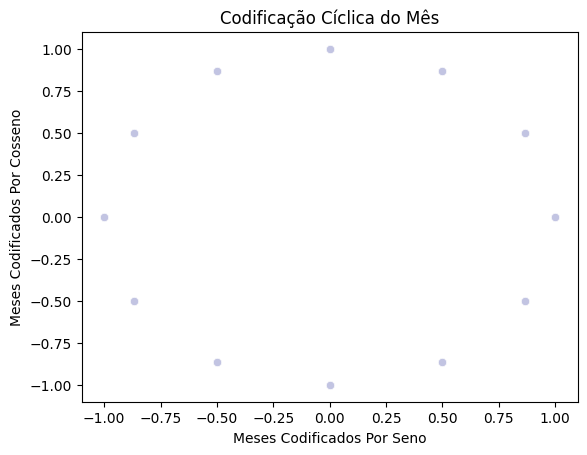

In [22]:
cyclic_month = sns.scatterplot(x="month_sin",y="month_cos",data=dados, color="#C2C4E2")
cyclic_month.set_title("Codificação Cíclica do Mês")
cyclic_month.set_ylabel("Meses Codificados Por Cosseno")
cyclic_month.set_xlabel("Meses Codificados Por Seno")

Text(0.5, 0, 'Dias Codificados Por Seno')

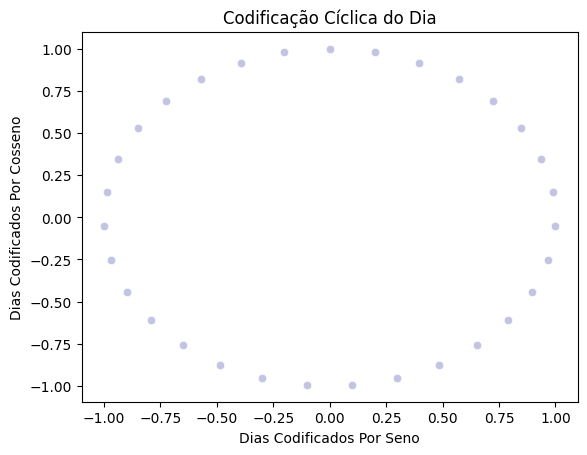

In [23]:
cyclic_day = sns.scatterplot(x='day_sin',y='day_cos',data=dados, color="#C2C4E2")
cyclic_day.set_title("Codificação Cíclica do Dia")
cyclic_day.set_ylabel("Dias Codificados Por Cosseno")
cyclic_day.set_xlabel("Dias Codificados Por Seno")

In [24]:
dados.shape

(142193, 30)

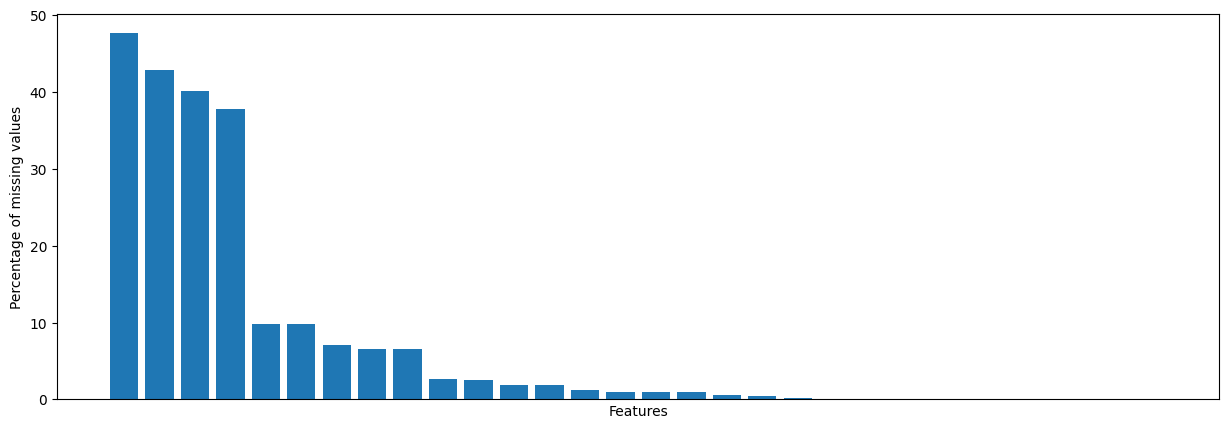

In [25]:
# Calculando a % de valores ausentes para cada variável
nulos = dados.isnull().sum().div(dados.shape[0]).mul(100).to_frame().sort_values(by = 0, ascending = False)

fig, ax = plt.subplots(figsize = (15, 5))
ax.bar(nulos.index, nulos.values.T[0])
plt.xticks([])
plt.xlabel("Features")
plt.ylabel("Percentage of missing values");

In [26]:
# Checando quantas colunas tem valores nulos >= 70%
col_nulo = nulos[nulos[0] > 70]
print("Existem " + str(len(col_nulo)) + "colunas com NaNs igual ou acima 70%.")

Existem 0colunas com NaNs igual ou acima 70%.


In [27]:
variaveis_categoricas = []
for i in dados.columns[0:31].tolist():
        if dados.dtypes[i] == 'object' or dados.dtypes[i] == 'category':
            variaveis_categoricas.append(i)

In [28]:
variaveis_categoricas

['Location',
 'WindGustDir',
 'WindDir9am',
 'WindDir3pm',
 'RainToday',
 'RainTomorrow']

In [29]:
# Valores faltantes nas variáveis categóricas
for i in variaveis_categoricas:
    print(i, dados[i].isnull().sum())

Location 0
WindGustDir 9330
WindDir9am 10013
WindDir3pm 3778
RainToday 1406
RainTomorrow 0


In [30]:
# Substituindo os valores nulos pela moda
for i in variaveis_categoricas:
    dados[i].fillna(dados[i].mode()[0], inplace=True)

In [31]:
# Observando se a correção foi feita
for i in variaveis_categoricas:
    print(i, dados[i].isnull().sum())

Location 0
WindGustDir 0
WindDir9am 0
WindDir3pm 0
RainToday 0
RainTomorrow 0


In [32]:
# Carregando variaveis numéricas
variaveis_numericas = []
for i in dados.columns[0:31].tolist():
        if dados.dtypes[i] == 'int64' or dados.dtypes[i] == 'float64':
            variaveis_numericas.append(i)

In [33]:
# Valores faltantes nas variáveis numéricas
for i in variaveis_numericas:
    print(i, dados[i].isnull().sum())

MinTemp 637
MaxTemp 322
Rainfall 1406
Evaporation 60843
Sunshine 67816
WindGustSpeed 9270
WindSpeed9am 1348
WindSpeed3pm 2630
Humidity9am 1774
Humidity3pm 3610
Pressure9am 14014
Pressure3pm 13981
Cloud9am 53657
Cloud3pm 57094
Temp9am 904
Temp3pm 2726
month_sin 0
month_cos 0
day_sin 0
day_cos 0


In [34]:
# Substituindo os valores nulos pela mediana
for i in variaveis_numericas:
    dados[i].fillna(dados[i].median(), inplace=True)

In [36]:
# Conferindo
dados.isnull().sum().sum()

0

In [37]:
# Calculando a dispersão dos dados
sparsity = 1 - count_nonzero(dados) / dados.size
print("A dispersão do dataframe é: " + str(round(sparsity, 2)) + ".")

A dispersão do dataframe é: 0.03.


In [38]:
sparse.issparse(dados)

False

In [39]:
# Carregando variaveis numéricas para plot
variaveis_numericas = []
for i in dados.columns[0:31].tolist():
        if dados.dtypes[i] == 'int64' or dados.dtypes[i] == 'float64':
            variaveis_numericas.append(i)

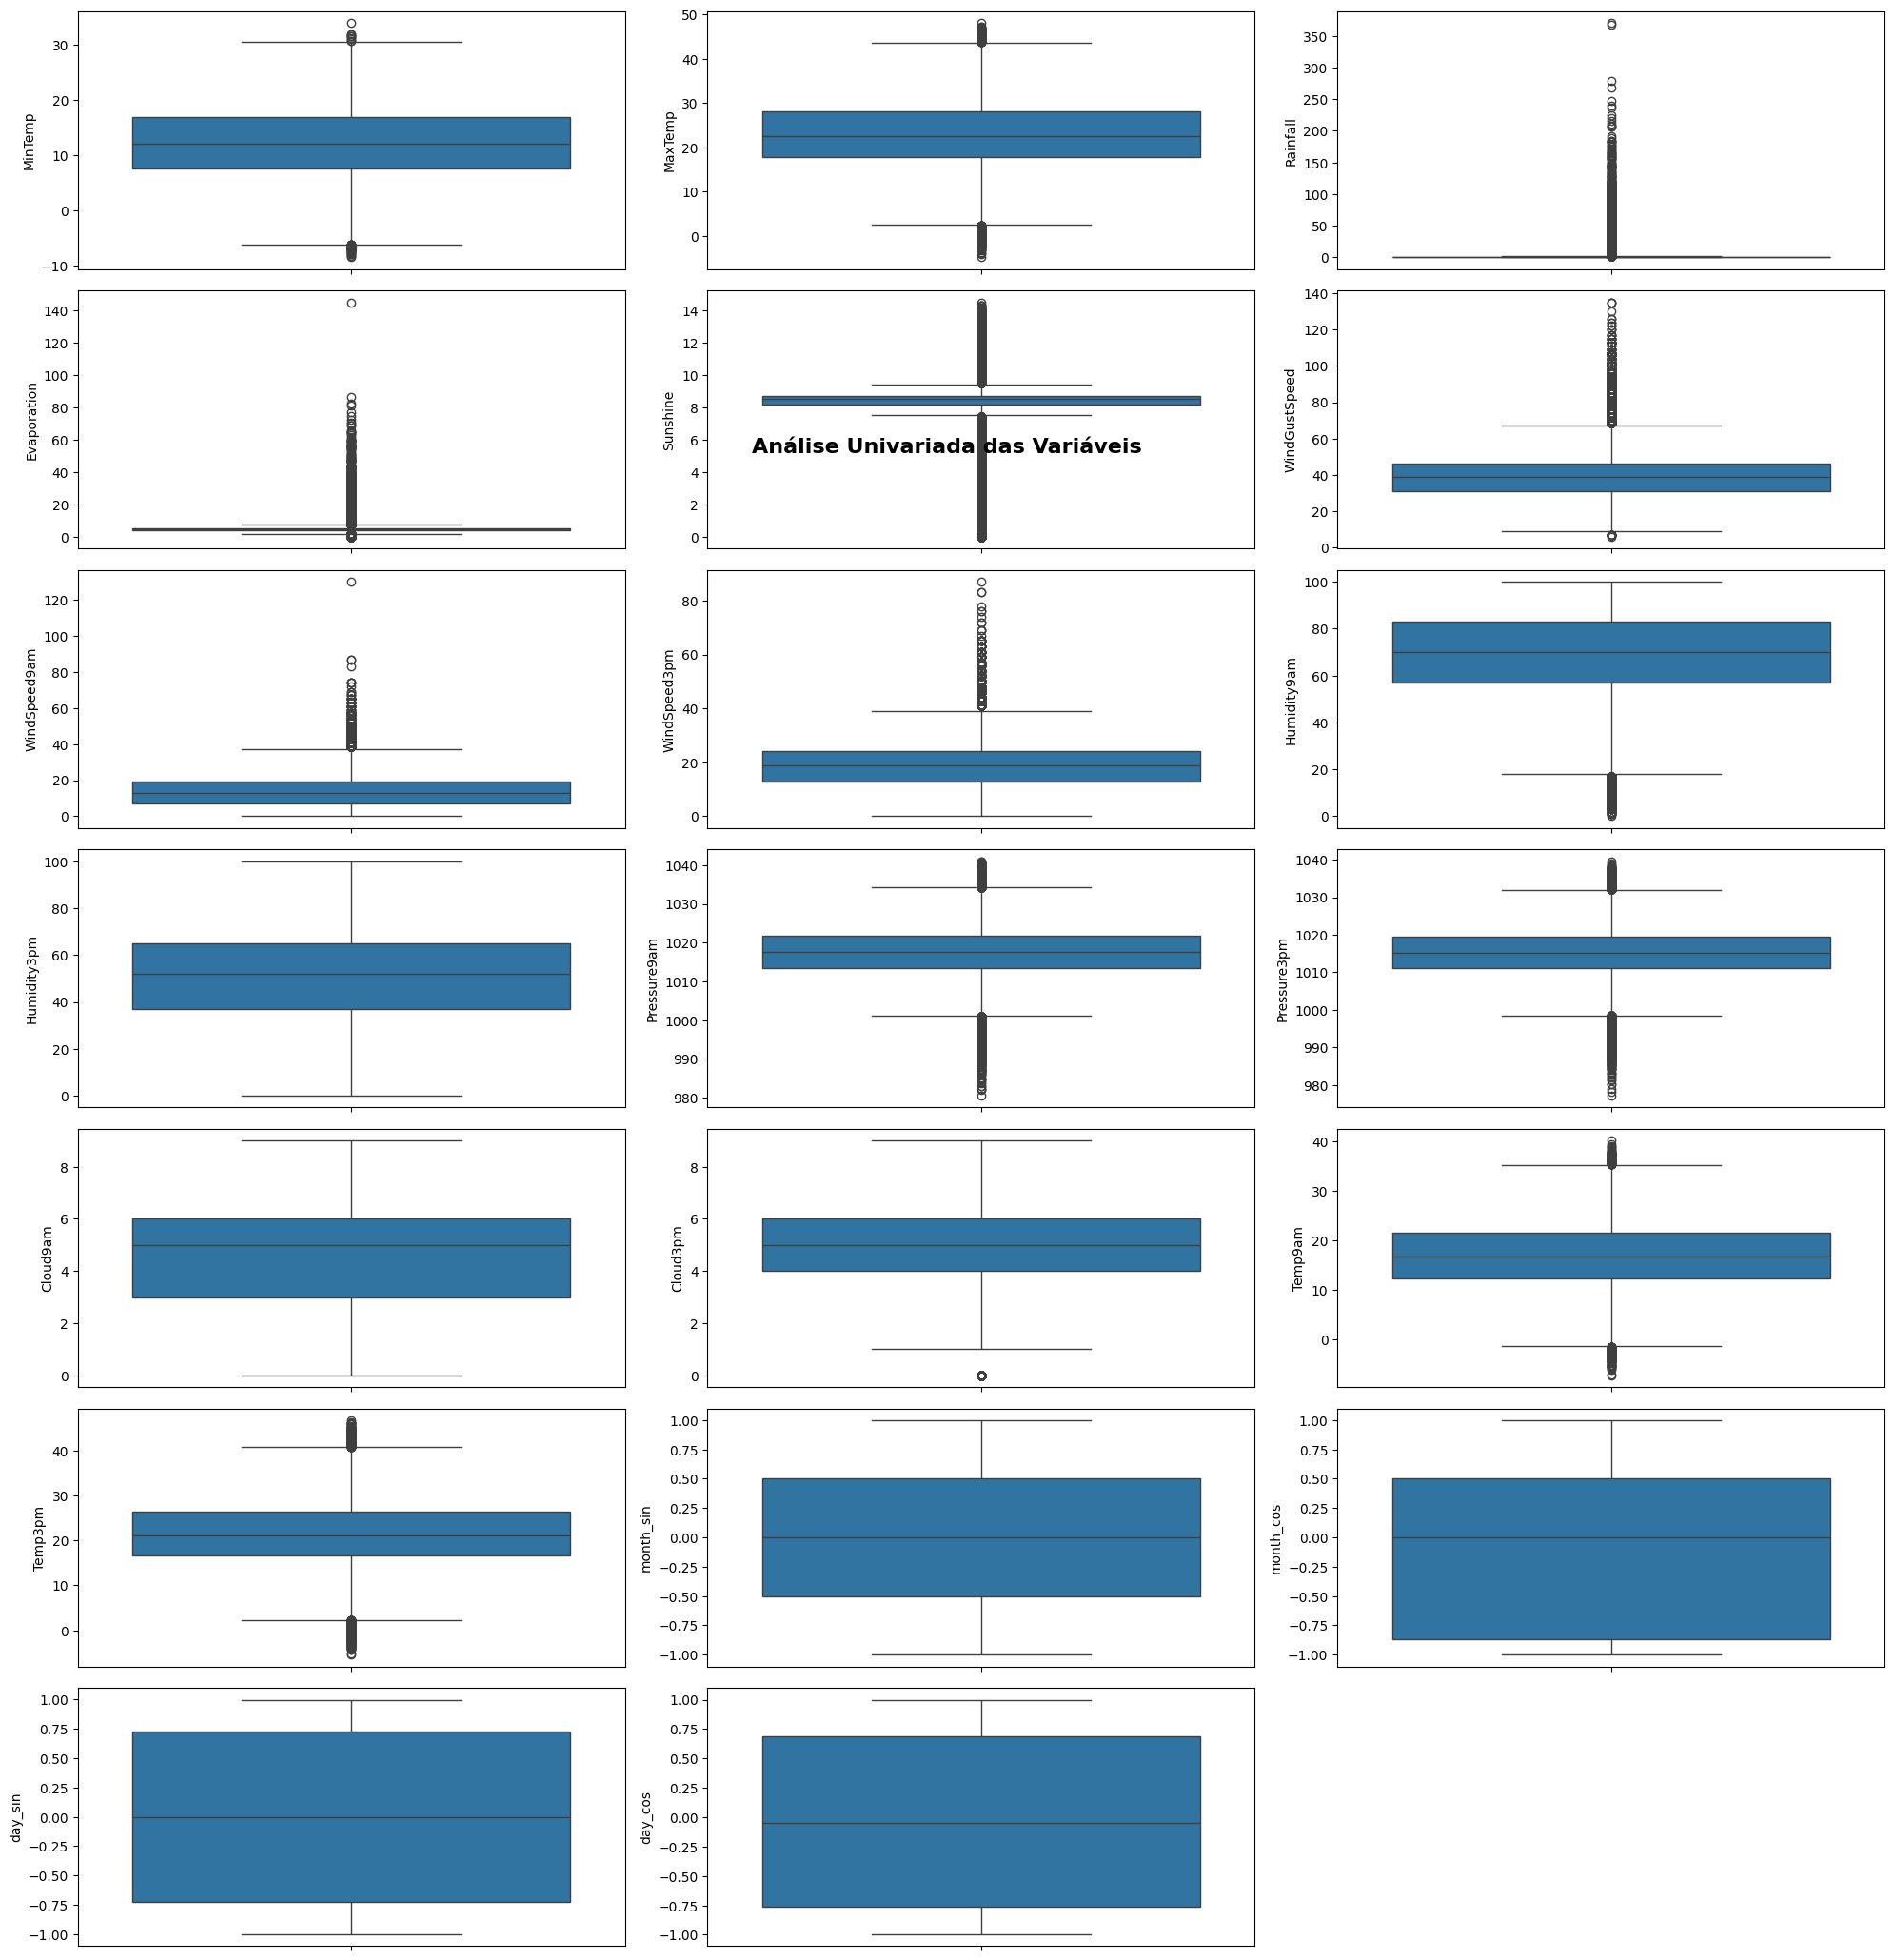

In [40]:
# Carregando boxplot para verificar outliers
plt.figure(figsize=(20,250))
plt.suptitle("Análise Univariada das Variáveis", fontsize=16, fontweight='bold')

for i in range(0,len(variaveis_numericas)):
    plt.subplot(85,3,i+1)
    sns.boxplot(dados[variaveis_numericas[i]])
    plt.tight_layout()

In [41]:
# Função para tratar os outliers
def remover_outlier(in_data,in_col):

    first_quantile = in_data[in_col].quantile(0.25)
    third_quantile = in_data[in_col].quantile(0.75)
    iqr = third_quantile - first_quantile
    upper_limit = third_quantile + 1.5 * iqr
    lower_limit = first_quantile - 1.5 * iqr
    in_data.loc[(in_data[in_col]>upper_limit), in_col] = upper_limit
    in_data.loc[(in_data[in_col]<lower_limit), in_col] = lower_limit
    return in_data

In [42]:
for i in variaveis_numericas:
    dados = remover_outlier(dados, i)

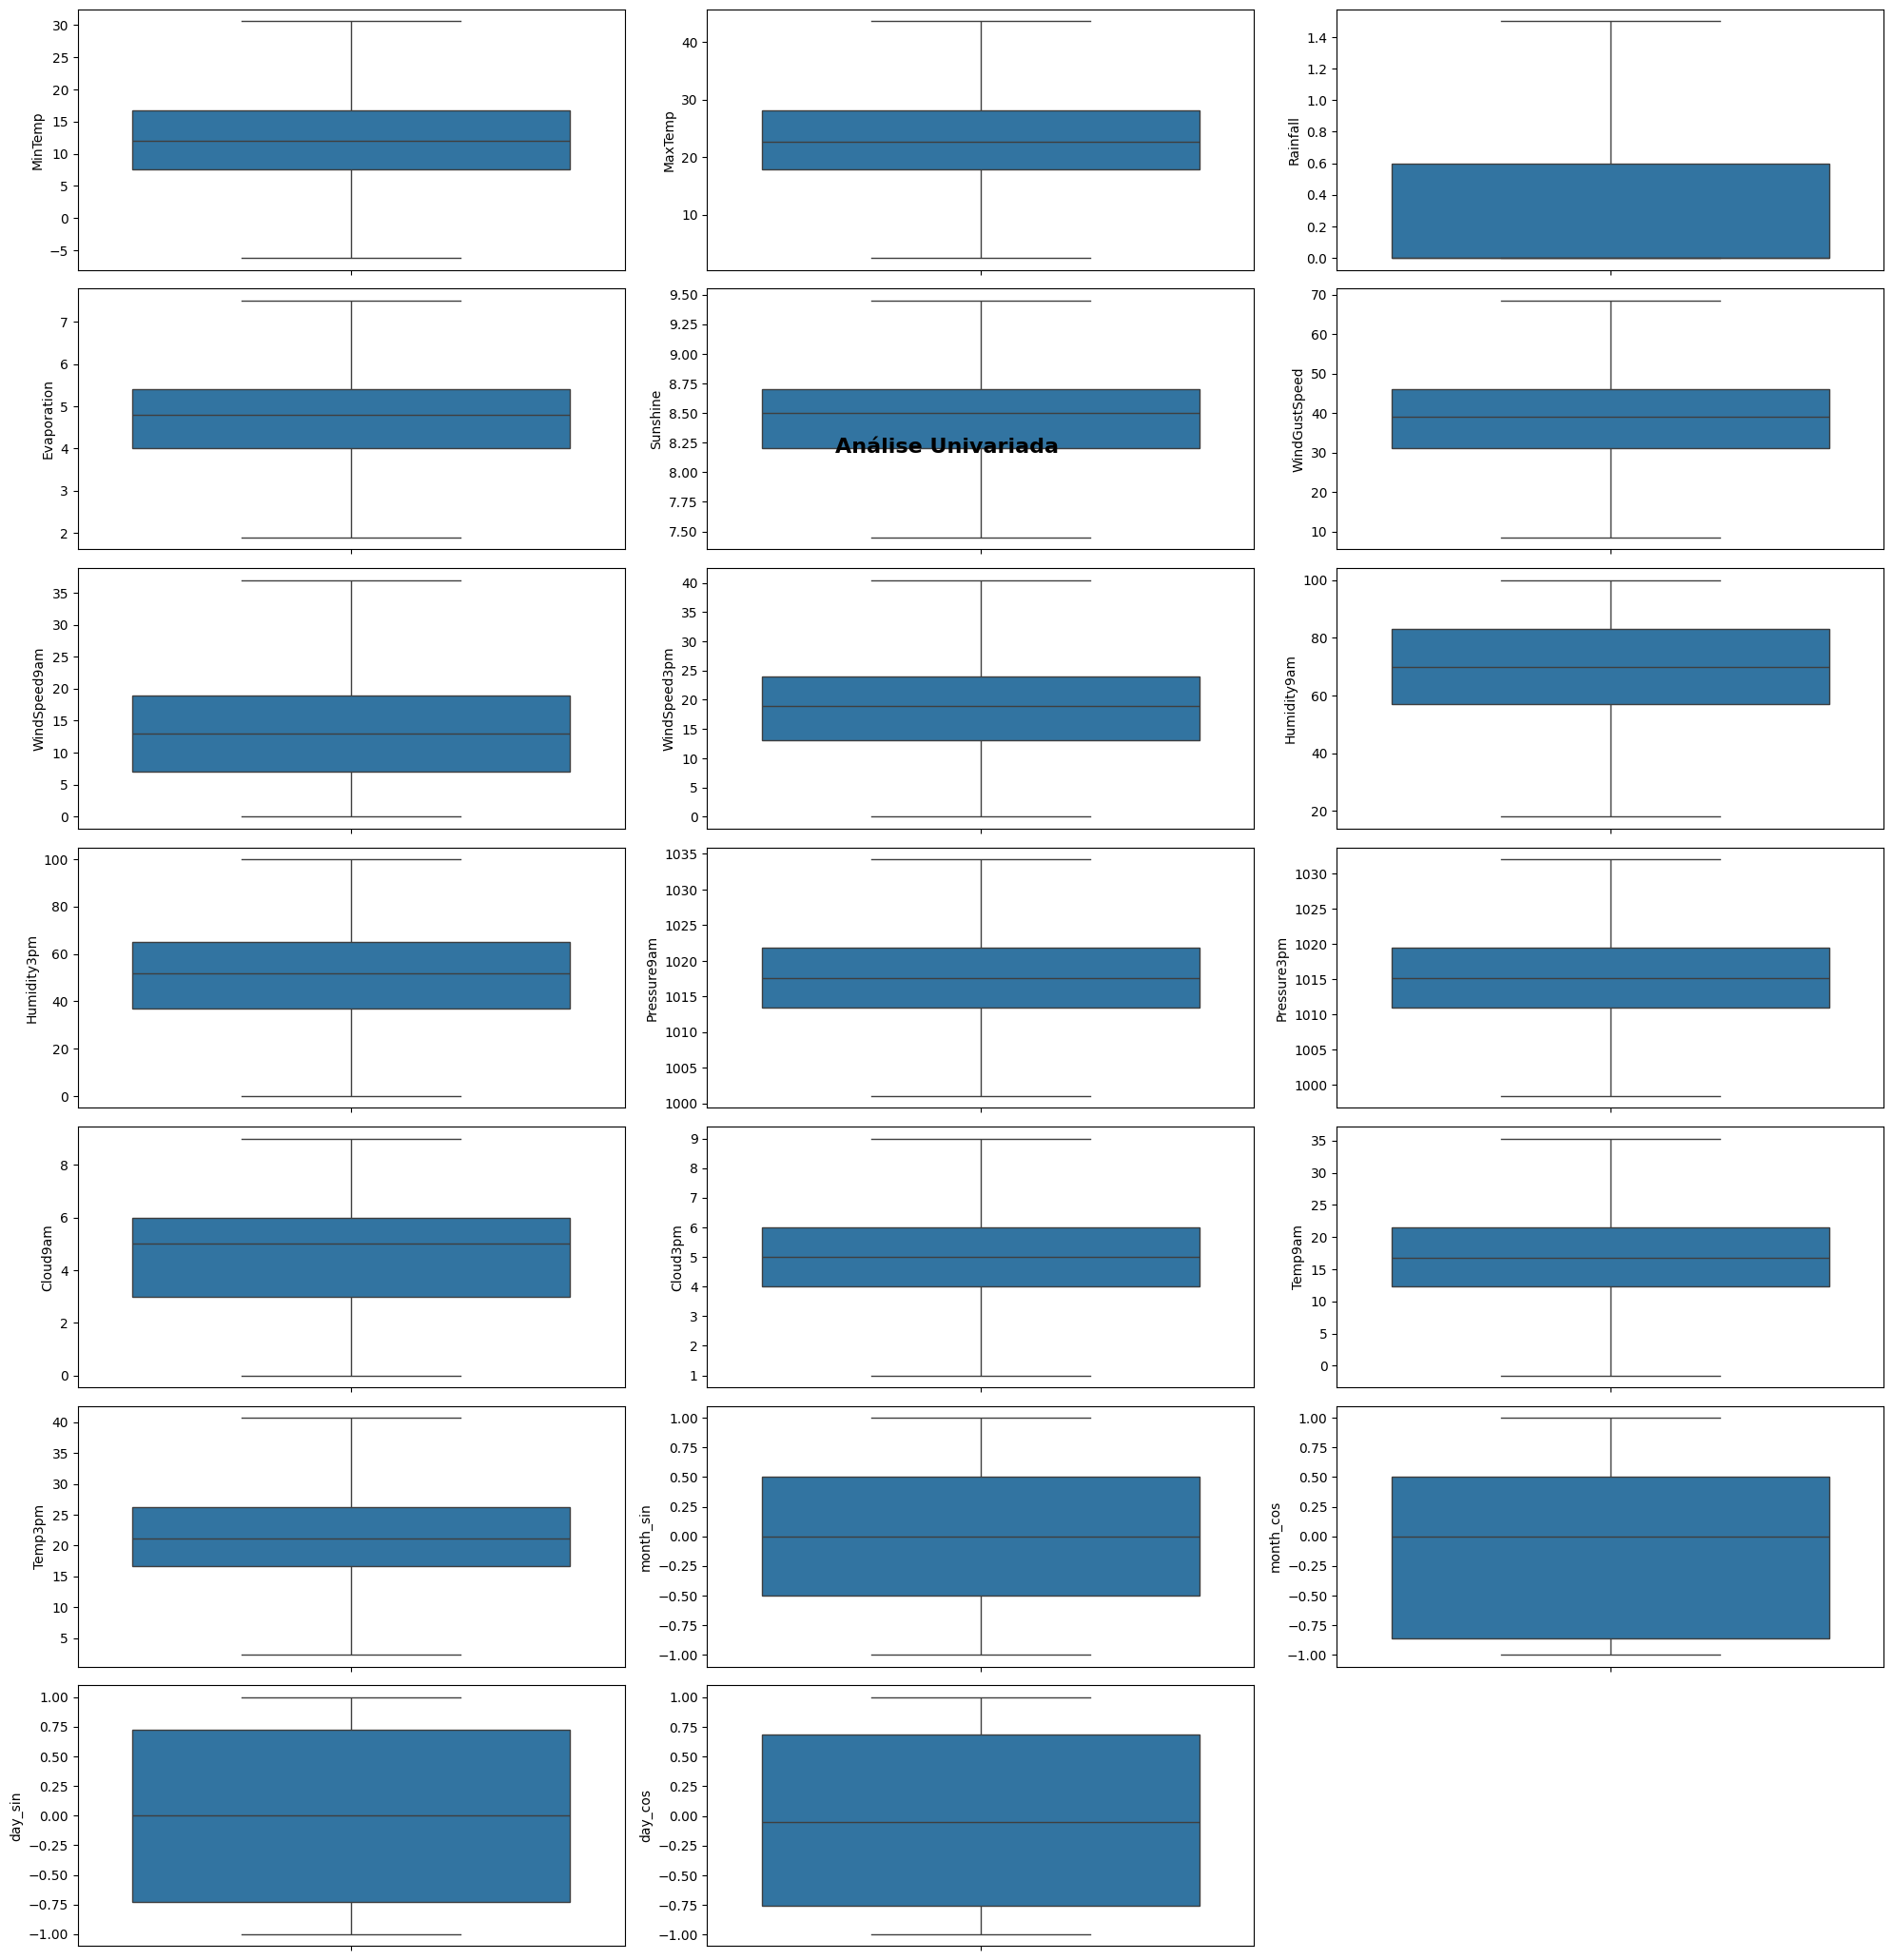

In [43]:
# Conferindo se os outliers foram removidos
plt.figure(figsize=(20,250))
plt.suptitle("Análise Univariada", fontsize=16, fontweight='bold')

for i in range(0,len(variaveis_numericas)):
    plt.subplot(85,3,i+1)
    sns.boxplot(dados[variaveis_numericas[i]])
    plt.tight_layout()

In [44]:
dados.shape

(142193, 30)

In [45]:
# Criando o encoder e aplicando OneHotEncoder
lb = LabelEncoder()
for var in variaveis_categoricas: # Loop na lista de variáveis actegóricas
    dados[var] = lb.fit_transform(dados[var]) # Convertendo para numérico

In [46]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
Index: 142193 entries, 0 to 145458
Data columns (total 30 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           142193 non-null  datetime64[ns]
 1   Location       142193 non-null  int64         
 2   MinTemp        142193 non-null  float64       
 3   MaxTemp        142193 non-null  float64       
 4   Rainfall       142193 non-null  float64       
 5   Evaporation    142193 non-null  float64       
 6   Sunshine       142193 non-null  float64       
 7   WindGustDir    142193 non-null  int64         
 8   WindGustSpeed  142193 non-null  float64       
 9   WindDir9am     142193 non-null  int64         
 10  WindDir3pm     142193 non-null  int64         
 11  WindSpeed9am   142193 non-null  float64       
 12  WindSpeed3pm   142193 non-null  float64       
 13  Humidity9am    142193 non-null  float64       
 14  Humidity3pm    142193 non-null  float64       
 15  Press

In [47]:
# Criando a variável target
target = dados['RainTomorrow']

In [48]:
# Dropando a variável que não servem
preditoras = dados.drop(['RainTomorrow','Date','day', 'month'], axis=1)

In [49]:
target.head()


0    0
1    0
2    0
3    0
4    0
Name: RainTomorrow, dtype: int64

In [50]:
preditoras.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,Year,month_sin,month_cos,day_sin,day_cos
0,2,13.40,22.90,0.60,4.80,8.50,13,44.00,13,14,20.00,24.00,71.00,22.00,1007.70,1007.10,8.00,5.00,16.90,21.80,0,2008,-0.00,1.00,0.20,0.98
1,2,7.40,25.10,0.00,4.80,8.50,14,44.00,6,15,4.00,22.00,44.00,25.00,1010.60,1007.80,5.00,5.00,17.20,24.30,0,2008,-0.00,1.00,0.39,0.92
2,2,12.90,25.70,0.00,4.80,8.50,15,46.00,13,15,19.00,26.00,38.00,30.00,1007.60,1008.70,5.00,2.00,21.00,23.20,0,2008,-0.00,1.00,0.57,0.82
3,2,9.20,28.00,0.00,4.80,8.50,4,24.00,9,0,11.00,9.00,45.00,16.00,1017.60,1012.80,5.00,5.00,18.10,26.50,0,2008,-0.00,1.00,0.72,0.69
4,2,17.50,32.30,1.00,4.80,8.50,13,41.00,1,7,7.00,20.00,82.00,33.00,1010.80,1006.00,7.00,8.00,17.80,29.70,0,2008,-0.00,1.00,0.85,0.53


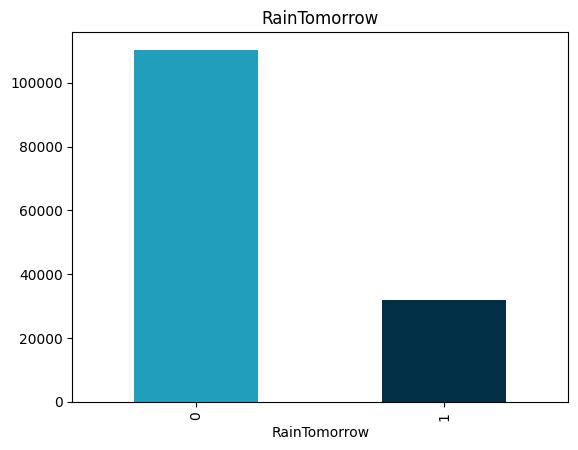

In [51]:
# Visualizando graficamente se o balanceadmento da variável target
target.value_counts().plot(kind='bar', title='RainTomorrow',color = ['#219ebc', '#023047']);

In [52]:
# Criando o balanceador SMOTE
balanceador = SMOTE()

In [53]:
# Aplicando o balanceador
preditoras_res, target_res = balanceador.fit_resample(preditoras, target)

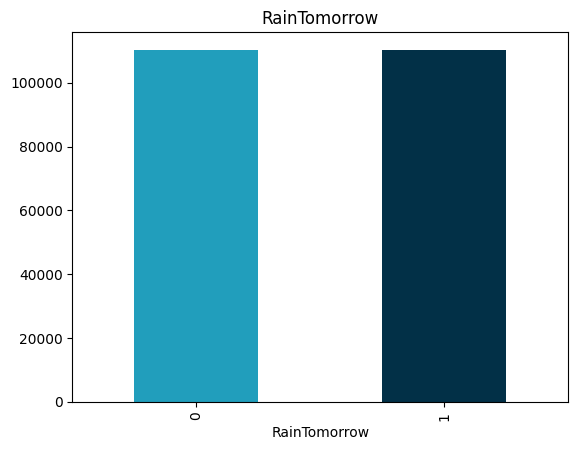

In [54]:
# Visualizando graficamente se o balanceadmento da variável target foi feito
target_res.value_counts().plot(kind='bar', title='RainTomorrow',color = ['#219ebc', '#023047']);

In [55]:
# Divisão em dados de treino e teste.
x_treino, x_teste, y_treino, y_teste = train_test_split(preditoras_res, target_res, test_size = 0.25)

In [57]:
# Normalizando os dados
normalizador = MinMaxScaler()
x_treino_normalizados = normalizador.fit_transform(x_treino)
x_teste_normalizados = normalizador.transform(x_teste)

In [58]:
# Antes de parar
early_stopping = callbacks.EarlyStopping(
    min_delta=0.001, # valor minimo para melhoria
    patience=20, # quantas épocas esperar antes de parar
    restore_best_weights=True,
)

In [59]:
# Construindo a rede neural
model = Sequential()

model.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu', input_dim = 26))
model.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

In [60]:
# Compilando a rede neural
opt = Adam(learning_rate=0.00009)
model.compile(optimizer = opt, loss = 'binary_crossentropy', metrics = ['accuracy'])

In [61]:
# Iniciando o treinamento
history = model.fit(x_treino_normalizados, y_treino, batch_size = 32, epochs = 200, callbacks=[early_stopping], validation_split=0.2)

Epoch 1/200
4137/4137 [==============================] - 16s 3ms/step - loss: 0.5792 - accuracy: 0.7115 - val_loss: 0.4779 - val_accuracy: 0.7828
Epoch 2/200
4137/4137 [==============================] - 12s 3ms/step - loss: 0.5132 - accuracy: 0.7705 - val_loss: 0.4621 - val_accuracy: 0.7873
Epoch 3/200
4137/4137 [==============================] - 10s 2ms/step - loss: 0.4978 - accuracy: 0.7775 - val_loss: 0.4504 - val_accuracy: 0.7905
Epoch 4/200
4137/4137 [==============================] - 11s 3ms/step - loss: 0.4901 - accuracy: 0.7778 - val_loss: 0.4442 - val_accuracy: 0.7916
Epoch 5/200
4137/4137 [==============================] - 12s 3ms/step - loss: 0.4856 - accuracy: 0.7798 - val_loss: 0.4429 - val_accuracy: 0.7897
Epoch 6/200
4137/4137 [==============================] - 14s 3ms/step - loss: 0.4831 - accuracy: 0.7794 - val_loss: 0.4386 - val_accuracy: 0.7931
Epoch 7/200
4137/4137 [==============================] - 14s 3ms/step - loss: 0.4821 - accuracy: 0.7796 - val_loss: 0.4395 -

In [62]:
y_pred = model.predict(x_teste_normalizados)
y_pred = (y_pred > 0.5)

1724/1724 [==============================] - 2s 1ms/step


In [69]:
y_pred

array([[False],
       [False],
       [False],
       ...,
       [ True],
       [False],
       [ True]])

In [70]:
y_teste

114857    0
138159    0
76091     0
200198    1
196946    1
105632    0
74875     0
41281     1
93505     1
119623    0
181605    1
37963     0
48032     0
71038     0
196316    1
156278    1
178891    1
19838     1
68660     0
218890    1
73709     0
220511    1
56699     1
196101    1
61977     0
93607     0
93111     0
42362     0
765       1
176606    1
161665    1
160630    1
142353    1
28324     1
3771      0
88382     1
19787     0
2066      0
6232      0
205899    1
102918    0
38586     0
124855    0
178691    1
123134    0
43423     1
129404    0
178225    1
189359    1
133830    0
15224     0
53833     0
72196     0
46069     1
115611    1
29925     0
68294     1
114454    0
183198    1
41648     0
57625     1
11891     0
2272      0
93834     0
125584    0
80014     0
134843    0
141386    0
183228    1
50565     1
7736      0
156903    1
183435    1
12623     0
213117    1
74447     0
181773    1
78984     0
135841    0
89632     1
64184     1
155795    1
33482     1
1547

In [71]:
print(classification_report(y_teste, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.92      0.87     27609
           1       0.91      0.81      0.86     27549

    accuracy                           0.86     55158
   macro avg       0.87      0.86      0.86     55158
weighted avg       0.87      0.86      0.86     55158



In [72]:
cm = confusion_matrix(y_teste, y_pred)
print(cm)

[[25283  2326]
 [ 5180 22369]]


In [73]:
cm_disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ["Sim","Não"])

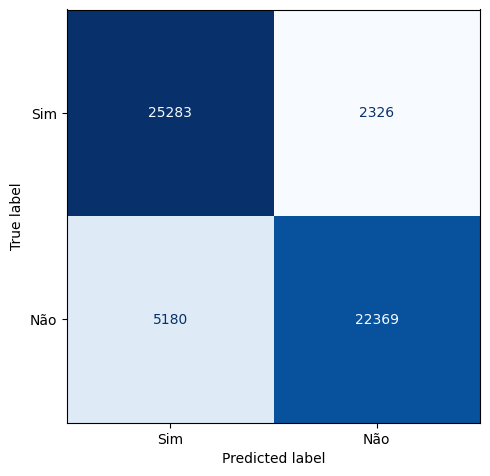

In [74]:
plt.rcParams["figure.figsize"] = [5.00, 5.00]
plt.rcParams["figure.autolayout"] = True
cm_disp.plot(include_values=True,
             cmap='Blues',
             colorbar=None)